# Implementing Gradient Descent
---
Let's implement gradient descent based off the cost function described in week 1 of the Coursera course!!

In [ ]:
! pip install matplotlib kagglehub pandas numpy scikit-learn

## Downloading dataset

In [ ]:
import kagglehub

path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset directory:", path)

path = path + "/Salary_dataset.csv"
print("Appended with /Salary_dataset.csv: ", path)

Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.
Path to dataset directory: /kaggle/input/salary-dataset-simple-linear-regression
Appended with /Salary_dataset.csv:  /kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


# Process dataset into training and test sets

In [ ]:
import pandas as pd

df = pd.read_csv(path)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df['YearsExperience'].to_numpy()
y = df['Salary'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=808)

X.shape[0], X_train.shape[0]

(30, 22)

## Implement gradient descent

In [ ]:
import numpy as np

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    m = X.shape[0]
    w = w_in
    b = b_in
    cost_history = []

    for i in range(num_iters):
        # calculates prediction based of weights and bias for each training example
        predictions = w * X + b

        # calculate cost to store for later visualization
        cost = np.mean((predictions - y) ** 2) / 2
        cost_history.append(cost)

        # calculates error based on prediction
        error = predictions - y

        # value of the derivative of cost function at that specific weight and bias
        dJ_dw = (1/m) * np.sum(error * X)
        dJ_db = (1/m) * np.sum(error)

        # update our weights and biases towards direction of greatest descent
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db


    return w, b, cost_history

## Plot best-fit line

First we plot it against our training data, pretty well matching!

Final w: 9648.237039988273
Final b: 23349.665581835707


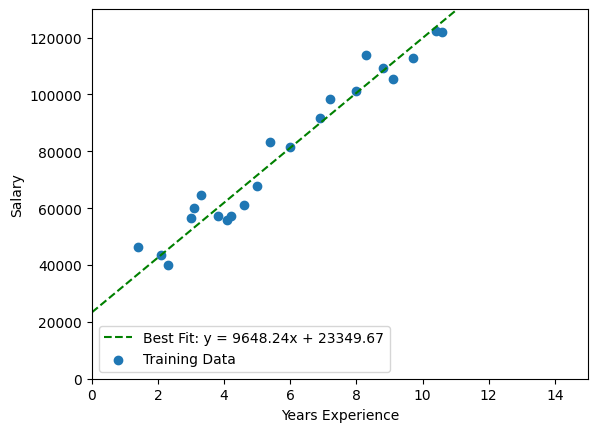

In [ ]:
import matplotlib.pyplot as plt

# Initialize parameters
w_initial = 0
b_initial = 0
learning_rate = 0.0125 # found by graphing learning rate vs RMSE
iterations = 1000

# Run gradient descent
w_final, b_final, history = gradient_descent(X_train, y_train, w_initial, b_initial, learning_rate, iterations)

print(f"Final w: {w_final}")
print(f"Final b: {b_final}")

# Plot the results
plt.axline((0, b_final), slope=w_final, linestyle='--', color='green', label=f'Best Fit: y = {w_final:.2f}x + {b_final:.2f}')
plt.xlim(0, 15)
plt.ylim(0, 130000)
plt.scatter(X_train, y_train, label='Training Data')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

### Visualize cost function over number of iterations



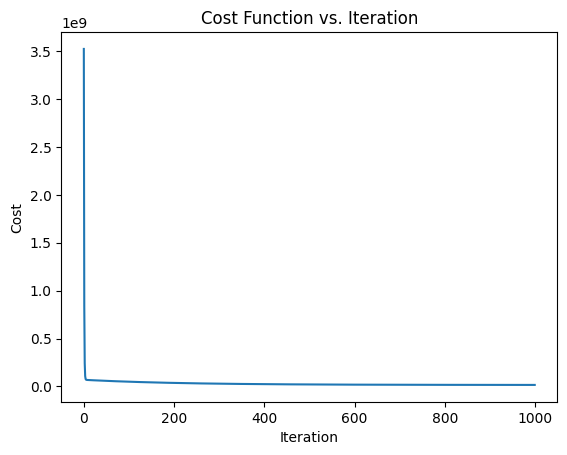

In [ ]:
plt.plot(history)
plt.title("Cost Function vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

### Now Let's see how our model fits the testing data

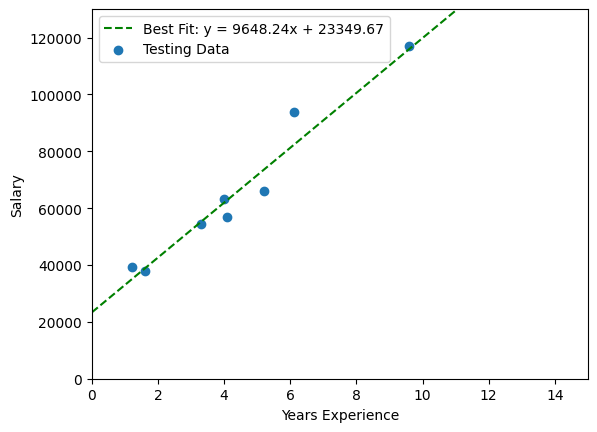

In [ ]:
# Plot the results
plt.axline((0, b_final), slope=w_final, linestyle='--', color='green', label=f'Best Fit: y = {w_final:.2f}x + {b_final:.2f}')
plt.xlim(0, 15)
plt.ylim(0, 130000)
plt.scatter(X_test, y_test, label='Testing Data')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Evaluating model performance

Here we use root mean squared error, comparing our learning rates

In [ ]:
#def mean_squared_error(y_true, y_pred):
#    return np.mean((y_pred - y_true) ** 2)

def root_mean_square_error(X, y, w, b):
    predictions = w * X + b

    error = (predictions - y) ** 2

    mse = np.mean(error)

    return np.sqrt(mse)

In [ ]:
root_mean_square_error(X_test, y_test, w_final, b_final)

np.float64(5624.231645627135)

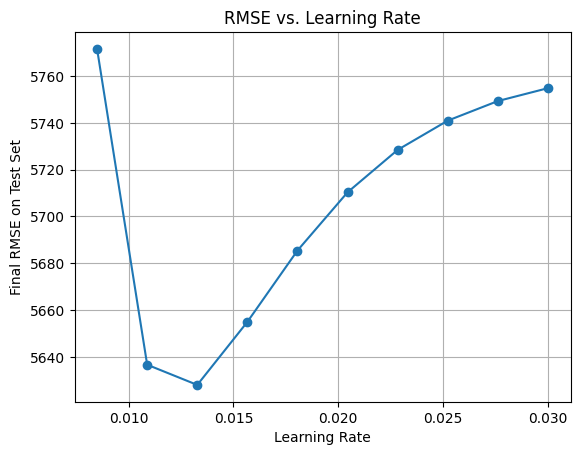

In [ ]:
#learning_rates = [0.1, 0.03, 0.01, 0.003, 0.001, 0.0001]
learning_rates = np.linspace(0.0085, 0.03, num=10)
rmse_errors = []

for alpha in learning_rates:
    # train the model with the current learning rate
    w_final, b_final, _ = gradient_descent(X_train, y_train, 0, 0, alpha, 1000)

    rmse =  root_mean_square_error(X_test, y_test, w_final, b_final)
    rmse_errors.append(rmse)


plt.plot(learning_rates, rmse_errors, marker='o')
plt.title("RMSE vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Final RMSE on Test Set")
#plt.xscale('log') # Use log scale for better visualization of learning rates
plt.grid(True)
plt.show()